# Viagem do zezinho

Este trabalho tem como objetivo descrever alguns problemas que o Zezinho teve em sua viagem e a partir dos algoritmos estudados podemos ajudá-lo.

Os problemas da viagem são os seguintes:

- Achar o menor caminho para o seu destino, utilizando o algoritmo de Dijkstra;
- Guardar seus brinquedos no cofre do hotel, onde ele tem uma capacidade especifica, seus brinquedos tem tamanhos específicos e o valor sentimental de cada um deles (Knapsack - PD);
- Verificar quais são as atrações turísticas mais próximas (Par de pontos mais próximos - Greedy). 

### 1º - Menor caminho entre a fonte e seu destino

Zezinho e sua família querem viajar para alguma capital do Brasil. A ideia é encontrar o menor caminho entre a fonte e o destino final (que eles ainda não sabem).

In [88]:
!pip install networkx
!pip install matplotlib
!pip install ipywidgets
!pip install scipy

import networkx as nx
from networkx.generators.random_graphs import erdos_renyi_graph


import matplotlib.pyplot as plt

import random

import ipywidgets as widgets

Vamos simular abaixo as capitais dos estados do Brasil e randomizar o peso das estradas

In [89]:
capitais = ["São Paulo","Rio de Janeiro","Belo Horizonte","Salvador","Fortaleza","Curitiba","Manaus","Recife","Belém","Porto Alegre","Goiânia","São Luís","Maceió","Campo Grande","Natal","Teresina","João Pessoa","Aracaju","Cuiabá","Florianópolis","Macapá","Porto Velho","Rio Branco","Vitória","Boa Vista","Palmas"]

O código abaixo vai gerar um grafo randomizado de Erdos Renyi simulando as estradas entre as capitais

In [90]:
n = 26
p = 0.13
g = erdos_renyi_graph(n, p, seed=123)

Agora definimos as labels de cada nó com os seus respectivos nomes

In [91]:
map_capitais = {k:v for k,v in zip(range(0,len(capitais)),capitais)}

g_capitais = nx.relabel_nodes(g,map_capitais)

Utilizando a biblioteca random, vamos definir pesos positivos entre 1 a 10 para cada aresta

In [92]:
for (u, v) in g_capitais.edges():
    g_capitais.edges[u,v]['weight'] = random.randint(0,10)

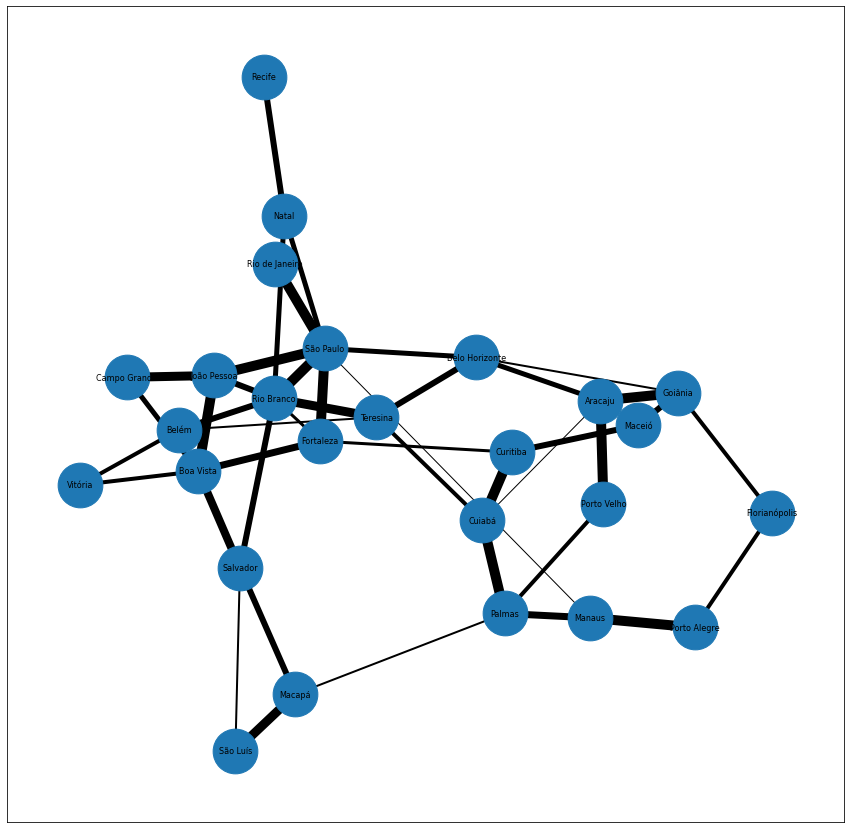

In [93]:
fig,ax = plt.subplots(figsize =(15,15))

pos = nx.spring_layout(g_capitais, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(g_capitais, pos, node_size=2000, ax=ax)

pesos = [d["weight"] for (u, v, d) in g_capitais.edges(data=True)]

#edges
nx.draw_networkx_edges(g_capitais, pos, width=pesos, ax=ax)

#labels
nx.draw_networkx_labels(g_capitais, pos, font_size=8, ax=ax)

plt.show()

In [94]:
[(v,i) for i,v in enumerate(capitais)]

[('São Paulo', 0),
 ('Rio de Janeiro', 1),
 ('Belo Horizonte', 2),
 ('Salvador', 3),
 ('Fortaleza', 4),
 ('Curitiba', 5),
 ('Manaus', 6),
 ('Recife', 7),
 ('Belém', 8),
 ('Porto Alegre', 9),
 ('Goiânia', 10),
 ('São Luís', 11),
 ('Maceió', 12),
 ('Campo Grande', 13),
 ('Natal', 14),
 ('Teresina', 15),
 ('João Pessoa', 16),
 ('Aracaju', 17),
 ('Cuiabá', 18),
 ('Florianópolis', 19),
 ('Macapá', 20),
 ('Porto Velho', 21),
 ('Rio Branco', 22),
 ('Vitória', 23),
 ('Boa Vista', 24),
 ('Palmas', 25)]

In [95]:
origem = widgets.Dropdown(
    options=[(v,i) for i,v in enumerate(capitais)],
    value=2,
    description='Origem:',
)

destino = widgets.Dropdown(
    options=[(v,i) for i,v in enumerate(capitais)],
    value=5,
    description='Destino:',
)

In [96]:
display(origem)
display(destino)

Dropdown(description='Origem:', index=2, options=(('São Paulo', 0), ('Rio de Janeiro', 1), ('Belo Horizonte', …

Dropdown(description='Destino:', index=5, options=(('São Paulo', 0), ('Rio de Janeiro', 1), ('Belo Horizonte',…

Agora, o próximo passo é utilizar o algoritmo de Dijkstra pra encontrar o menor caminho entre uma fonte e um destino.

In [97]:
def minDistance(dist,queue):

    minimum = float("Inf")
    min_index = -1

    for i in range(len(dist)):
        if dist[i] < minimum and i in queue:
            minimum = dist[i]
            min_index = i
    return min_index

In [98]:
def listaCaminho(parent, j):
    caminho = []
    while(j!=-1):
        caminho.append(map_capitais[j])
        j = parent[j]
        
    caminho.reverse()
    return caminho

In [99]:
def callback_caminho(dist, parent, src, dstny):

    h = 0
    for i in range(1, len(dist)):
        

        if i == dstny:
            h = 1
            return (listaCaminho(parent,i),dist[i])
    
    if h == 0:
        return -1,-1

In [100]:
def dijkstra(graph, src, dstny):

    row = len(graph)
    col = len(graph[0])

    dist = [float("Inf")] * row
    parent = [-1] * row
    dist[src] = 0
    queue = []

    for i in range(row):
        queue.append(i)

    while queue:

        u = minDistance(dist,queue)
        queue.remove(u)

        for i in range(col):
            if graph[u][i] and i in queue:
                if dist[u] + graph[u][i] < dist[i]:
                    dist[i] = dist[u] + graph[u][i]
                    parent[i] = u

    return callback_caminho(dist,parent, src, dstny)

Certo!

Com o algoritmo implementado, faremos a transformação do dicionário para a matriz de adjacências.

In [101]:
g_m = nx.adjacency_matrix(nx.Graph(g_capitais)).todense().tolist()

C:\Users\gabri\AppData\Local\Temp\ipykernel_3612\421575305.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  g_m = nx.adjacency_matrix(nx.Graph(g_capitais)).todense().tolist()


Finalmente, obtemos o peso do menor caminho e o próprio caminho que a família percorreu.

In [102]:
caminho,peso = dijkstra(g_m, origem.value, destino.value)

print(f'Peso do caminho: {peso}')
print(f'Caminho:',' -> '.join(caminho))

Peso do caminho: 14
Caminho: Belo Horizonte -> Goiânia -> Maceió -> Curitiba


### 2° - Guardar seus brinquedos no cofre do hotel

Depois de algumas horas de viagem, a família do Zezinho finalmente chega ao hotel. 

A mãe do Zezinho fala pra ele que eles só iriam pra piscina quando o Zezinho terminasse de guardar seus brinquedos, que estavam na mochila.

Ele não quer que todo mundo tenha fácil acesso aos brinquedos dele no armário, então ele quer guardar aqueles que ele tem mais valor sentimental no cofre.

#### Utilizaremos a solução do KnapSack para resolvermos a solução. 

Primeiro criamos uma lista de brinquedos que o Zezinho levou pra viagem.

In [103]:
brinquedos = ["trem",
            "rodinho",
            "pula-pirata",
            "varetinha",
            "dinossauro",
            "pop-it",
            "bola",
            "ursinho",
            "patinho",
            "avião",
            "giz de cera",
            "carrinho de controle-remoto",
            "dominó",
            "lego",
            "max steel",
            "hot wheels",
            "uno",
            "Nintendo Switch",
            "nerf",
            "beyblade"]

Cada brinquedo possui um valor sentimental pra ele (representado pela lista 'valor_sent') e um peso, em gramas (representado pela lista 'peso'). 

Acontece que o cofre possui um peso máximo (representado pela variável 'peso_max') — logo, pode não haver a possiblidade de colocar todos os brinquedos lá dentro, apesar do cofre ser bem grande.

'valor_sent', 'peso', e 'peso_max' receberão valores aleatórios.



In [104]:
valor_sent = []
peso = []

peso_max = random.randrange (50,300)

for i in range (len(brinquedos)):
    x = random.randrange(1,1000)
    y = random.randrange(1,200)
    valor_sent.append(x)
    peso.append(y)

In [105]:
for i in range (len(brinquedos)):
    print(f'Nome: {brinquedos[i]} \t Valor sentimental: {valor_sent[i]} \t Peso: {peso[i]}g')


Nome: trem 	 Valor sentimental: 463 	 Peso: 79g
Nome: rodinho 	 Valor sentimental: 296 	 Peso: 166g
Nome: pula-pirata 	 Valor sentimental: 923 	 Peso: 1g
Nome: varetinha 	 Valor sentimental: 427 	 Peso: 143g
Nome: dinossauro 	 Valor sentimental: 599 	 Peso: 67g
Nome: pop-it 	 Valor sentimental: 725 	 Peso: 1g
Nome: bola 	 Valor sentimental: 965 	 Peso: 196g
Nome: ursinho 	 Valor sentimental: 788 	 Peso: 80g
Nome: patinho 	 Valor sentimental: 997 	 Peso: 164g
Nome: avião 	 Valor sentimental: 89 	 Peso: 158g
Nome: giz de cera 	 Valor sentimental: 49 	 Peso: 152g
Nome: carrinho de controle-remoto 	 Valor sentimental: 998 	 Peso: 10g
Nome: dominó 	 Valor sentimental: 776 	 Peso: 65g
Nome: lego 	 Valor sentimental: 881 	 Peso: 112g
Nome: max steel 	 Valor sentimental: 384 	 Peso: 69g
Nome: hot wheels 	 Valor sentimental: 211 	 Peso: 70g
Nome: uno 	 Valor sentimental: 400 	 Peso: 122g
Nome: Nintendo Switch 	 Valor sentimental: 810 	 Peso: 143g
Nome: nerf 	 Valor sentimental: 166 	 Peso: 112g

In [106]:
print('O peso máximo é: ', peso_max)

O peso máximo é:  100


Agora utilizamos a função do knapSack.

In [126]:
def knapSack(peso_max, peso, valor_sent, n):
    K = [[0 for _ in range(peso_max + 1)] for _ in range(n + 1)]

    for i in range(n + 1):

        for w in range(0, peso_max + 1):

            if i == 0 or w == 0:
                K[i][w] = 0
            elif peso[i-1] <= w:
                K[i][w] = max(valor_sent[i-1] + K[i-1][w-peso[i-1]], K[i-1][w])

            else:
                K[i][w] = K[i-1][w]

    return K[n][peso_max]

x = knapSack(peso_max, peso, valor_sent, len(brinquedos))
print(f'{x} é a soma dos valores sentimentais dos brinquedos que podem ser colocado no cofre.')

3434 é a soma dos valores sentimentais dos brinquedos que podem ser colocado no cofre.


### 3° - Verificar quais são as atrações turísticas mais próximas